In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance

In [8]:
# Python code for 2D random walk.
import numpy
import pylab
import random
  
def pnl_walk(a, n, rates):
    # defining the number of steps

    #creating two array for containing x and y coordinate
    #of size equals to the number of size and filled up with 0's
    x = numpy.zeros(n)
    x[0] = a

    # filling the coordinates with random variables
    for i in range(1, n):
        rate = random.choice(rates)
        x[i] = x[i-1]*(1+rate)
    
    
    return x

#x = pnl_walk(3250, 100)
## plotting stuff:
#plt.ticklabel_format(style = 'plain')
#pylab.title("Random Walk ($n = " + str(100) + "$ steps)")
#pylab.plot(x)
##pylab.savefig("rand_walk"+str(n)+".png",bbox_inches="tight",dpi=600)
#pylab.show()

In [9]:
def simulate_rndm_pnl(n_sims, starting_val, steps, rates):
    ends = []
    sers = []
    for i in range(n_sims):
        ser = pnl_walk(starting_val, steps, rates)
        ends.append(ser[-1])
        sers.append(ser)
    return sers, ends
    plt.ticklabel_format(style = 'plain')
    #print(f'Mean Ending Value = {np.mean(ends)}, Sd = {np.std(ends)/n_sims}')

In [11]:
def simulate_returns(data, rolling_lookback, n_paths, n_days_project, pred_col = 'Close'):
   

    cur = data[f'{pred_col}']
    rolling_sd = data['rolling_sd']
    rolling_mean = data['rolling_mean']
    #print(data, rolling_sd, rolling_mean)
    generated = np.random.normal(rolling_mean,rolling_sd,1000)
    #print(generated)
    #plt.hist(generated)
    paths, ends = simulate_rndm_pnl(n_paths, cur, n_days_project,generated)
    df = pd.DataFrame(paths).transpose()
    for col in df:
        plt.plot(df[col])
    #print(f'Current Price. {cur}')
    #print(f'Projected Mean in {n_days_project} days. {np.mean(ends)}')
    #print(f'Projected Standard Deviation in {n_days_project} days. {np.std(ends)}')
    return np.mean(ends), np.std(ends)


In [ ]:
def historical_test(rolling_lookback, n_paths, n_days_project):
    data = yfinance.download('SPY')
    data['Pct_Change'] = data['Close'].pct_change()
    data['log_return'] = np.log(1 + data.Pct_Change)
    data['rolling_mean'] = data['Pct_Change'].rolling(rolling_lookback).mean()
    data['rolling_sd'] = data['Pct_Change'].rolling(rolling_lookback).std()
    data = data.dropna(axis = 0)
    E = []
    s = []
    for i in range(len(data) - n_days_project):
        print(int(i)/(len(data)-n_days_project)*100)
        sim_mu, sim_sd = simulate_returns(data.iloc[i], rolling_lookback, n_paths, n_days_project)
        E.append(sim_mu)
        s.append(sim_sd)
    data = data.iloc[0:len(data)-n_days_project]
    data['E'] = E
    data['s'] = s
    dta['Actual'] = dta['Close'].shift(-1*n_days_project)
    dta['Error'] = dta['Actual'] - dta['E']
    return data

[*********************100%***********************]  1 of 1 completed
0.0
0.014064697609001406
0.02812939521800281
0.04219409282700422
0.05625879043600562
0.07032348804500703
0.08438818565400844
0.09845288326300984
0.11251758087201125
0.12658227848101267
0.14064697609001406
0.15471167369901548
0.16877637130801687
0.1828410689170183
0.19690576652601968
0.21097046413502107
0.2250351617440225
0.23909985935302389
0.25316455696202533
0.2672292545710267
0.2812939521800281
0.29535864978902954
0.30942334739803096
0.3234880450070323
0.33755274261603374
0.35161744022503516
0.3656821378340366
0.37974683544303794
0.39381153305203936
0.4078762306610408
0.42194092827004215
0.4360056258790436
0.450070323488045
0.4641350210970464
0.47819971870604777
0.49226441631504925
0.5063291139240507
0.520393811533052
0.5344585091420534
0.5485232067510549
0.5625879043600562
0.5766526019690577
0.5907172995780591
0.6047819971870605
0.6188466947960619
0.6329113924050633
0.6469760900140646
0.6610407876230662
0.67510548

6.30098452883263
6.315049226441631
6.329113924050633
6.343178621659634
6.357243319268635
6.371308016877637
6.385372714486638
6.39943741209564
6.413502109704641
6.427566807313642
6.441631504922644
6.455696202531645
6.469760900140647
6.483825597749648
6.4978902953586495
6.5119549929676515
6.5260196905766525
6.5400843881856545
6.554149085794656
6.568213783403657
6.582278481012659
6.59634317862166
6.610407876230662
6.624472573839663
6.638537271448664
6.652601969057666
6.666666666666667
6.680731364275667
6.69479606188467
6.70886075949367
6.722925457102673
6.736990154711673
6.751054852320674
6.765119549929677
6.779184247538677
6.79324894514768
6.8073136427566805
6.821378340365682
6.8354430379746836
6.849507735583685
6.863572433192687
6.877637130801688
6.891701828410689
6.905766526019691
6.919831223628692
6.933895921237693
6.947960618846695
6.962025316455696
6.976090014064698
6.990154711673699
7.0042194092827
7.018284106891702
7.032348804500703
7.046413502109705
7.060478199718706
7.0745428973

12.71448663853727
12.728551336146273
12.742616033755274
12.756680731364275
12.770745428973276
12.784810126582277
12.79887482419128
12.812939521800281
12.827004219409282
12.841068917018283
12.855133614627285
12.869198312236287
12.883263009845288
12.89732770745429
12.91139240506329
12.925457102672292
12.939521800281295
12.953586497890296
12.967651195499297
12.981715893108298
12.995780590717299
13.009845288326302
13.023909985935303
13.037974683544304
13.052039381153305
13.066104078762306
13.080168776371309
13.09423347398031
13.108298171589311
13.122362869198312
13.136427566807313
13.150492264416316
13.164556962025317
13.178621659634318
13.19268635724332
13.20675105485232
13.220815752461323
13.234880450070325
13.248945147679326
13.263009845288327
13.277074542897328
13.291139240506327
13.305203938115332
13.319268635724333
13.333333333333334
13.347398030942333
13.361462728551334
13.375527426160339
13.38959212376934
13.403656821378341
13.41772151898734
13.431786216596342
13.445850914205346
13

18.90295358649789
18.91701828410689
18.931082981715893
18.945147679324894
18.959212376933895
18.973277074542896
18.9873417721519
19.0014064697609
19.015471167369903
19.029535864978904
19.043600562587905
19.057665260196906
19.071729957805907
19.085794655414908
19.09985935302391
19.11392405063291
19.12798874824191
19.142053445850916
19.156118143459917
19.170182841068918
19.18424753867792
19.198312236286917
19.21237693389592
19.226441631504922
19.240506329113924
19.254571026722925
19.268635724331926
19.28270042194093
19.29676511954993
19.310829817158933
19.324894514767934
19.33895921237693
19.353023909985936
19.367088607594937
19.381153305203938
19.39521800281294
19.40928270042194
19.423347398030945
19.437412095639946
19.451476793248943
19.465541490857944
19.479606188466946
19.49367088607595
19.50773558368495
19.521800281293952
19.535864978902953
19.549929676511955
19.56399437412096
19.57805907172996
19.592123769338958
19.60618846694796
19.62025316455696
19.634317862165965
19.648382559774

25.11954992967651
25.13361462728551
25.14767932489452
25.16174402250352
25.17580872011252
25.18987341772152
25.20393811533052
25.21800281293952
25.23206751054852
25.246132208157523
25.260196905766524
25.274261603375525
25.288326300984533
25.302390998593534
25.31645569620253
25.330520393811533
25.344585091420534
25.358649789029535
25.372714486638536
25.386779184247537
25.400843881856538
25.41490857946554
25.42897327707454
25.44303797468355
25.457102672292546
25.471167369901547
25.485232067510548
25.49929676511955
25.51336146272855
25.52742616033755
25.541490857946552
25.555555555555554
25.569620253164555
25.58368495077356
25.59774964838256
25.61181434599156
25.625879043600563
25.639943741209564
25.654008438818565
25.668073136427566
25.682137834036567
25.696202531645568
25.71026722925457
25.724331926863574
25.738396624472575
25.752461322081576
25.766526019690577
25.780590717299578
25.79465541490858
25.80872011251758
25.82278481012658
25.836849507735582
25.850914205344584
25.8649789029535

31.37834036568214
31.39240506329114
31.40646976090014
31.42053445850914
31.434599156118143
31.448663853727144
31.462728551336145
31.476793248945146
31.49085794655415
31.504922644163152
31.518987341772153
31.533052039381154
31.547116736990155
31.561181434599156
31.575246132208157
31.58931082981716
31.60337552742616
31.61744022503516
31.631504922644165
31.645569620253166
31.659634317862167
31.67369901547117
31.68776371308017
31.70182841068917
31.71589310829817
31.729957805907173
31.744022503516174
31.758087201125175
31.772151898734176
31.78621659634318
31.80028129395218
31.814345991561183
31.828410689170184
31.842475386779185
31.856540084388186
31.870604781997187
31.88466947960619
31.89873417721519
31.91279887482419
31.926863572433195
31.940928270042196
31.954992967651197
31.9690576652602
31.9831223628692
31.9971870604782
32.0112517580872
32.0253164556962
32.0393811533052
32.0534458509142
32.06751054852321
32.08157524613221
32.09563994374121
32.10970464135021
32.123769338959214
32.137834

37.721518987341774
37.735583684950775
37.749648382559776
37.76371308016878
37.77777777777778
37.79184247538678
37.80590717299578
37.81997187060478
37.83403656821378
37.848101265822784
37.862165963431785
37.876230661040786
37.89029535864979
37.90436005625879
37.91842475386779
37.93248945147679
37.94655414908579
37.96061884669479
37.9746835443038
37.9887482419128
38.0028129395218
38.016877637130804
38.030942334739805
38.045007032348806
38.05907172995781
38.07313642756681
38.08720112517581
38.10126582278481
38.11533052039381
38.12939521800281
38.143459915611814
38.157524613220815
38.171589310829816
38.18565400843882
38.19971870604782
38.21378340365682
38.22784810126582
38.24191279887482
38.25597749648382
38.27004219409283
38.28410689170183
38.29817158931083
38.312236286919834
38.326300984528835
38.340365682137836
38.35443037974684
38.36849507735584
38.38255977496484
38.39662447257383
38.41068917018284
38.42475386779184
38.438818565400844
38.452883263009845
38.466947960618846
38.4810126582

44.13502109704641
44.14908579465541
44.163150492264414
44.17721518987342
44.19127988748242
44.205344585091424
44.219409282700425
44.23347398030943
44.24753867791843
44.26160337552743
44.27566807313642
44.289732770745424
44.303797468354425
44.31786216596343
44.331926863572434
44.345991561181435
44.360056258790436
44.37412095639944
44.38818565400844
44.40225035161744
44.41631504922644
44.43037974683544
44.44444444444444
44.45850914205345
44.47257383966245
44.48663853727145
44.500703234880454
44.51476793248945
44.52883263009845
44.54289732770745
44.55696202531645
44.57102672292545
44.585091420534454
44.59915611814346
44.61322081575246
44.627285513361464
44.641350210970465
44.655414908579466
44.66947960618847
44.68354430379747
44.69760900140647
44.71167369901547
44.72573839662447
44.73980309423347
44.75386779184248
44.76793248945148
44.781997187060476
44.79606188466948
44.81012658227848
44.82419127988748
44.83825597749648
44.85232067510548
44.86638537271448
44.880450070323484
44.8945147679

50.534458509142056
50.54852320675105
50.56258790436006
50.576652601969066
50.59071729957806
50.60478199718707
50.61884669479606
50.63291139240506
50.646976090014064
50.661040787623065
50.675105485232066
50.68917018284107
50.70323488045007
50.71729957805907
50.73136427566808
50.74542897327707
50.75949367088608
50.773558368495074
50.78762306610408
50.801687763713076
50.815752461322084
50.82981715893108
50.84388185654009
50.85794655414908
50.87201125175809
50.8860759493671
50.90014064697609
50.91420534458509
50.92827004219409
50.942334739803094
50.956399437412095
50.970464135021096
50.98452883263009
50.9985935302391
51.01265822784811
51.0267229254571
51.04078762306611
51.0548523206751
51.06891701828411
51.082981715893105
51.09704641350211
51.11111111111111
51.125175808720115
51.13924050632911
51.15330520393812
51.16736990154712
51.18143459915612
51.19549929676512
51.20956399437412
51.22362869198312
51.237693389592124
51.251758087201125
51.26582278481012
51.27988748241913
51.29395218002812

56.86357243319269
56.87763713080168
56.89170182841069
56.90576652601968
56.91983122362869
56.9338959212377
56.94796061884669
56.9620253164557
56.976090014064695
56.9901547116737
57.0042194092827
57.018284106891706
57.0323488045007
57.04641350210971
57.0604781997187
57.07454289732771
57.08860759493671
57.102672292545705
57.11673699015471
57.13080168776371
57.144866385372715
57.15893108298171
57.17299578059072
57.18706047819971
57.20112517580872
57.21518987341773
57.22925457102672
57.24331926863573
57.257383966244724
57.27144866385373
57.285513361462726
57.299578059071735
57.31364275668073
57.32770745428974
57.34177215189873
57.35583684950774
57.36990154711674
57.383966244725734
57.39803094233474
57.412095639943736
57.426160337552744
57.44022503516174
57.45428973277075
57.46835443037974
57.48241912798875
57.49648382559776
57.51054852320675
57.52461322081576
57.53867791842475
57.55274261603376
57.566807313642755
57.58087201125176
57.59493670886076
57.60900140646976
57.62306610407876
57.63

63.33333333333333
63.34739803094234
63.36146272855133
63.37552742616034
63.38959212376933
63.40365682137834
63.41772151898735
63.43178621659634
63.44585091420535
63.459915611814345
63.473980309423354
63.48804500703235
63.50210970464135
63.51617440225035
63.53023909985935
63.54430379746835
63.55836849507735
63.57243319268636
63.586497890295355
63.60056258790436
63.61462728551336
63.628691983122366
63.64275668073136
63.65682137834037
63.67088607594936
63.68495077355837
63.69901547116738
63.71308016877637
63.72714486638537
63.741209563994374
63.755274261603375
63.76933895921238
63.78340365682138
63.79746835443038
63.81153305203938
63.82559774964838
63.83966244725738
63.85372714486639
63.867791842475384
63.88185654008439
63.895921237693386
63.909985935302394
63.92405063291139
63.9381153305204
63.95218002812939
63.9662447257384
63.98030942334741
63.9943741209564
64.00843881856541
64.0225035161744
64.03656821378341
64.0506329113924
64.06469760900141
64.0787623066104
64.09282700421942
64.1068

69.84528832630097
69.85935302390999
69.87341772151898
69.88748241912799
69.90154711673699
69.915611814346
69.929676511955
69.943741209564
69.957805907173
69.971870604782
69.985935302391
70.0
70.014064697609
70.028129395218
70.042194092827
70.056258790436
70.070323488045
70.084388185654
70.09845288326301
70.11251758087201
70.12658227848101
70.14064697609001
70.15471167369901
70.16877637130801
70.18284106891703
70.19690576652602
70.21097046413503
70.22503516174402
70.23909985935303
70.25316455696202
70.26722925457103
70.28129395218002
70.29535864978904
70.30942334739802
70.32348804500702
70.33755274261604
70.35161744022503
70.36568213783404
70.37974683544303
70.39381153305204
70.40787623066103
70.42194092827005
70.43600562587903
70.45007032348805
70.46413502109705
70.47819971870605
70.49226441631505
70.50632911392405
70.52039381153305
70.53445850914206
70.54852320675106
70.56258790436006
70.57665260196906
70.59071729957806
70.60478199718706
70.61884669479606
70.63291139240506
70.64697609

76.35724331926863
76.37130801687763
76.38537271448665
76.39943741209564
76.41350210970465
76.42756680731364
76.44163150492264
76.45569620253164
76.46976090014064
76.48382559774964
76.49789029535864
76.51195499296765
76.52601969057665
76.54008438818566
76.55414908579465
76.56821378340366
76.58227848101265
76.59634317862167
76.61040787623065
76.62447257383967
76.63853727144866
76.65260196905767
76.66666666666667
76.68073136427567
76.69479606188467
76.70886075949367
76.72292545710268
76.73699015471168
76.75105485232068
76.76511954992968
76.77918424753868
76.79324894514767
76.80731364275668
76.82137834036568
76.83544303797468
76.84950773558369
76.86357243319269
76.87763713080169
76.89170182841069
76.90576652601969
76.91983122362869
76.93389592123769
76.94796061884671
76.9620253164557
76.9760900140647
76.9901547116737
77.0042194092827
77.0182841068917
77.0323488045007
77.0464135021097
77.0604781997187
77.0745428973277
77.0886075949367
77.10267229254572
77.1167369901547
77.13080168776372
77.

82.81293952180027
82.82700421940929
82.84106891701828
82.85513361462729
82.86919831223629
82.8832630098453
82.8973277074543
82.91139240506328
82.9254571026723
82.93952180028128
82.9535864978903
82.96765119549929
82.9817158931083
82.99578059071729
83.0098452883263
83.0239099859353
83.0379746835443
83.0520393811533
83.06610407876231
83.08016877637131
83.09423347398031
83.10829817158931
83.12236286919831
83.13642756680731
83.15049226441631
83.16455696202532
83.17862165963432
83.19268635724332
83.20675105485232
83.22081575246132
83.23488045007032
83.24894514767932
83.26300984528832
83.27707454289732
83.29113924050633
83.30520393811534
83.31926863572433
83.33333333333334
83.34739803094233
83.36146272855134
83.37552742616033
83.38959212376935
83.40365682137833
83.41772151898735
83.43178621659635
83.44585091420534
83.45991561181435
83.47398030942334
83.48804500703235
83.50210970464134
83.51617440225036
83.53023909985934
83.54430379746836
83.55836849507735
83.57243319268636
83.58649789029536
8

89.26863572433193
89.28270042194093
89.29676511954993
89.31082981715893
89.32489451476793
89.33895921237693
89.35302390998594
89.36708860759494
89.38115330520394
89.39521800281294
89.40928270042194
89.42334739803094
89.43741209563994
89.45147679324894
89.46554149085794
89.47960618846695
89.49367088607595
89.50773558368496
89.52180028129395
89.53586497890296
89.54992967651195
89.56399437412095
89.57805907172995
89.59212376933895
89.60618846694796
89.62025316455696
89.63431786216597
89.64838255977496
89.66244725738397
89.67651195499296
89.69057665260198
89.70464135021096
89.71870604781998
89.73277074542897
89.74683544303798
89.76090014064697
89.77496483825598
89.78902953586498
89.80309423347398
89.81715893108299
89.83122362869199
89.84528832630099
89.85935302390999
89.87341772151899
89.88748241912799
89.90154711673699
89.915611814346
89.929676511955
89.943741209564
89.957805907173
89.971870604782
89.985935302391
90.0
90.014064697609
90.028129395218
90.042194092827
90.056258790436
90.0703

95.8649789029536
95.87904360056258
95.8931082981716
95.90717299578058
95.9212376933896
95.93530239099859
95.9493670886076
95.96343178621659
95.9774964838256
95.9915611814346
96.0056258790436
96.01969057665261
96.0337552742616
96.04781997187061
96.0618846694796
96.07594936708861
96.0900140646976
96.10407876230661
96.11814345991561
96.13220815752462
96.14627285513362
96.16033755274262
96.17440225035162
96.18846694796062
96.20253164556962
96.21659634317862
96.23066104078762
96.24472573839662
96.25879043600563
96.27285513361463
96.28691983122363
96.30098452883263
96.31504922644163
96.32911392405063
96.34317862165963
96.35724331926863
96.37130801687763
96.38537271448664
96.39943741209565
96.41350210970464
96.42756680731365
96.44163150492264
96.45569620253166
96.46976090014064
96.48382559774966
96.49789029535864
96.51195499296765
96.52601969057665
96.54008438818565
96.55414908579466
96.56821378340365
96.58227848101266
96.59634317862165
96.61040787623067
96.62447257383965
96.63853727144867
96

NameError: name 'lookback' is not defined

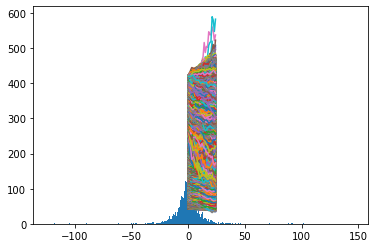

In [13]:
pnls = {}
for lookback in range(2,25):
    for proj in range(2,5):
        print(f'Testing lookback {lookback} and projection days {proj}')
        if lookback == 4:
            if proj == 4:
                dta = historical_test(25,25,25)

                plt.hist(dta['Error'], bins = 1000)
                pnl = [100000]
                pnl_spy = [100000]
                for i in range(len(dta)-1):
                    pnl_spy.append(pnl_spy[-1] * (1+dta.iloc[i+1]['Pct_Change']))
                    if dta.iloc[i]['Close'] < dta.iloc[i]['E']:
                        pnl.append(pnl[-1]*(1+dta.iloc[i+1]['Pct_Change']))
                    else:
                        pnl.append(pnl[-1])
                        #pnl.append(pnl[i]*(1+(-1*dta.iloc[i]['Pct_Change'])))
                        #errors.append(dta.iloc[i]['Actual'] - dta.iloc[i]['E'])
                pnls[f'{lookback}_{proj}'] = pnl 
    #plt.plot(pnl, label = f'{lookback}_{proj}_pnl')
    pnls[f'Long Spy'] = pnl_spy
    #plt.plot(pnl_spy, label = 'Long SPY')
    #else:
#    dta = historical_test(lookback,25,proj)
#    dta['Actual'] = dta['Close'].shift(-1*proj)
#    dta['Error'] = dta['Actual'] - dta['E']
#    plt.hist(dta['Error'], bins = 1000)
#    pnl = [100000]

    #pnl_spy = [100000]


#    for i in range(len(dta)-1):
#        #pnl_spy.append(pnl_spy[-1] * (1+dta.iloc[i+1]['Pct_Change']))
#        if dta.iloc[i]['Close'] < dta.iloc[i]['E']:
#            pnl.append(pnl[-1]*(1+dta.iloc[i+1]['Pct_Change']))
#       else:
#            pnl.append(pnl[-1])
            #pnl.append(pnl[i]*(1+(-1*dta.iloc[i]['Pct_Change'])))
        #errors.append(dta.iloc[i]['Actual'] - dta.iloc[i]['E'])
#    pnls[f'{lookback}_{proj}'] = pnl 
    #plt.plot(pnl, label = f'{lookback}_{proj}_pnl')


#plt.legend()
        

In [30]:
pnl_df = pd.DataFrame(pnl, columns = ['pnl'])
pnl_df

,pnl
0,100000.000000
1,99658.469945
2,99863.387978
3,99590.163934
4,98565.573770
...,...
7105,250578.793309
7106,250022.827753
7107,250519.009908
7108,250519.009908


In [29]:
import scipy.stats as ss
ss.mode(pnl_df['pnl'])

ModeResult(mode=array([0.]), count=array([2551]))

Sharpe(2_2):0    3.907207
dtype: float64
Sharpe(2_3):0    3.740305
dtype: float64
Sharpe(2_4):0    6.70835
dtype: float64
Sharpe(3_2):0    5.006585
dtype: float64
Sharpe(3_3):0    4.443148
dtype: float64
Sharpe(3_4):0    3.819295
dtype: float64
Sharpe(4_4):0    7.36637
dtype: float64
Sharpe(Long Spy):0    1.90033
dtype: float64


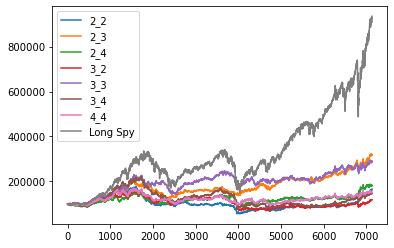

In [201]:
for key in pnls.keys():
    plt.plot(pnls[key], label = key)
    print(f'Sharpe({key}):{np.mean(pd.DataFrame(pnls[key])/np.std(pd.DataFrame(pnls[key])))}')
plt.legend()

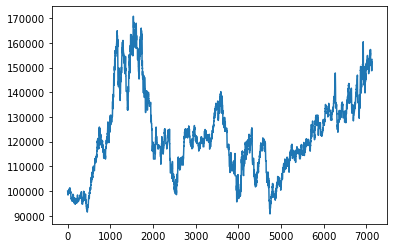

In [203]:
plt.plot(pnls['4_4'])

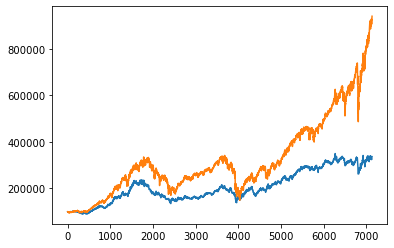

In [186]:
pnl = [100000]
errors = []
pnl_spy = [100000]

for i in range(len(dta)-1):
    pnl_spy.append(pnl_spy[-1] * (1+dta.iloc[i+1]['Pct_Change']))
    if dta.iloc[i]['Close'] < dta.iloc[i]['E']:
        pnl.append(pnl[-1]*(1+dta.iloc[i+1]['Pct_Change']))
    else:
        pnl.append(pnl[-1])
        #pnl.append(pnl[i]*(1+(-1*dta.iloc[i]['Pct_Change'])))
    errors.append(dta.iloc[i]['Actual'] - dta.iloc[i]['E'])
plt.plot(pnl)
plt.plot(pnl_spy)

In [185]:
print(np.mean(pnl)/np.std(pnl), np.mean(pnl_spy)/np.std(pnl_spy))

2.9992918571698945 1.8981687459753682


In [176]:
df = pd.DataFrame()
df['PNL']= pnl
df['PNL_Pct_Change'] = df.pct_change()
df['PNL_Change'] = df['PNL'] - df['PNL'].shift(1)
df
#plt.hist(df['PNL_Change'], bins = 1000)
#plt.hist(df['PNL'], bins = 1000)
df
#np.mean(df['PNL'])/np.std(df['PNL'])

,PNL,PNL_Pct_Change,PNL_Change
0,100.000000,NaN,NaN
1,100.205620,0.002056,0.205620
2,99.174698,-0.010288,-1.030922
3,99.655795,0.004851,0.481097
4,99.655795,0.000000,0.000000
...,...,...,...
4318,334.039206,0.003552,1.182326
4319,334.712606,0.002016,0.673400
4320,334.892706,0.000538,0.180101
4321,335.174578,0.000842,0.281872


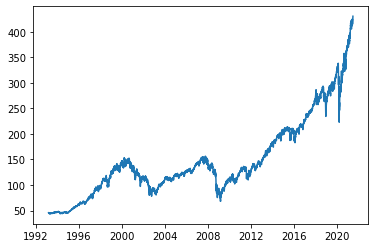

In [139]:
plt.plot(dta['Close'])


In [28]:
#simulated sp500
def pnl_walk(a, n, rates):
    # defining the number of steps
    
    # n must = lenrates

    #creating two array for containing x and y coordinate
    #of size equals to the number of size and filled up with 0's
    x = numpy.zeros(n)
    x[0] = a

    # filling the coordinates with random variables
    for i in range(1, n):
        rate = np.random.choice(rates)
        x[i] = x[i-1]*(1+rate)
    
    
    return x


In [45]:
def simulate_rndm_pnl(n_sims, starting_val, steps, generated):
    ends = []
    sers = []
    for i in range(n_sims):
        ser = pnl_walk(starting_val, steps, generated)
        sers.append(ser)
        ends.append(ser[-1])
        #plt.plot(ser)
    
    return sers, ends
    #plt.ticklabel_format(style = 'plain')
    #print(f'Mean Ending Value = {np.mean(ends)}, Sd = {np.std(ends)/n_sims}')

In [32]:
import pandas as pd
close_copy = close.copy()
cur = close_copy.iloc[-1]['log_return']
rolling_sd = close_copy.iloc[-1]['rolling_sd']
rolling_mean = close_copy.iloc[-1]['rolling_mean']
generated = np.random.normal(rolling_mean,rolling_sd,1000)
paths = simulate_rndm_pnl(1000, cur, 25,generated)
df = pd.DataFrame(paths).transpose()

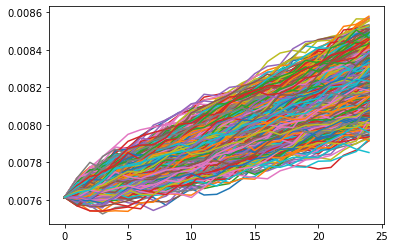

In [33]:
for col in df:
    plt.plot(df[col])

In [ ]:
data = 